## Code to generate code for the flyer

In [6]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import os

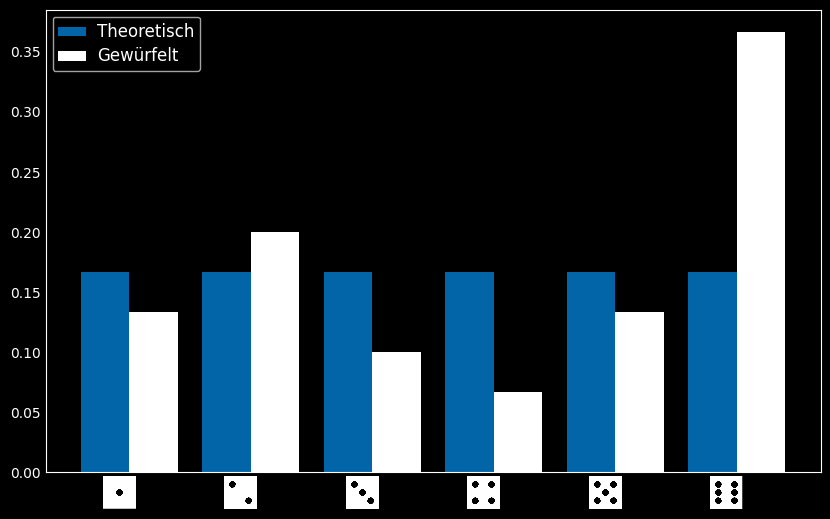

In [97]:
import matplotlib.pyplot as plt
import numpy as np
#df = pd.read_csv(data_path)

# helper function to place image on histogarmmplot
def place_image(ax, img_path, xy, zoom=1):
    # Load the image
    img = plt.imread(img_path)
    # Create an OffsetImage
    imagebox = OffsetImage(img, zoom=zoom)
    # Create an AnnotationBbox
    ab = AnnotationBbox(imagebox, xy, frameon=True, xybox=(10, -15), boxcoords="offset points", pad=0)
    # Add it to the axes
    ax.add_artist(ab)


column_name='numbers'
plt.style.use('dark_background')



probas=[0.05, 0.15, 0.1, 0.1, 0.1, 0.5]


# Generate random numbers with the defined probabilities
random_numbers = np.random.choice(np.arange(1, 7), size=30, p=probas)

df={'numbers': list(random_numbers)}

#df[column_name].hist()
# plt.title(f'Histogram of {column_name}')
# plt.xlabel(column_name)
# plt.ylabel('Frequency')  

STATPATH= '/home/bule/projects/Dice/rasperry_run/static'

rolls=list(df[column_name])      


# Theoretical distribution for a fair dice (uniform distribution)
fair_probs = [1/6] * 6  # Since each outcome (1-6) has an equal probability

if len(rolls) != 0:
    # Counting the frequency of each outcome for the unfair dice
    unfair_probs = [rolls.count(i) / len(rolls) for i in range(1, 7)]
    observed_frequencies = [rolls.count(i) for i in range(1, 7)]
    expected_frequencies = [len(rolls) / 6] * 6
    #chi_squared_stat, p_value = chisquare(observed_frequencies, f_exp=expected_frequencies)
    # Create the plot
    
    
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
# Plotting the bar charts
ax.bar(range(1, 7), fair_probs, alpha=1, color='#0165A8', label='Theoretisch', width=0.4)
if len(rolls) != 0:
    ax.bar([x + 0.4 for x in range(1, 7)], unfair_probs, alpha=1, color='#FFFFFF', label='Gewürfelt', width=0.4)
# Remove numerical x-tick labels and place images instead
ax.set_xticks(range(1, 7))
ax.set_xticklabels([])  # Remove x-tick labels
ax.tick_params(axis='both', which='both', length=0)  # Remove axis ticks
for i in range(1, 7):
    place_image(ax, os.path.join(STATPATH, f'side{i}.jpg'), xy=(i, 0), zoom=0.04)
# # Adding title and legend
# if len(rolls) != 0:
#     plt.title(f'Häufigkeiten von Würfelergebnissen, Anzahl Würfe: {len(rolls)}')# p= {p_value:.3f}')
# else:
#     plt.title(f'Häufigkeiten von Würfelergebnissen, Anzahl Würfe: {len(rolls)}')

legend = plt.legend()
for label in legend.get_texts():
    label.set_fontsize('large')
# Adjusting the x-axis label position
#plt.xlabel('Würfel Augen', labelpad=30)
#plt.ylabel('Relative Häufigkeit')